In [4]:
import pandas as pd
import numpy as np
from getData import getDataSplits
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Tuple
import model

learning_rate = 10e-6
max_epochs = 10_000_000
error_threshold = 10e-10
weight_decay = 10e-3

# Set seed for reproducibility
np.random.seed(seed=1234)

In [5]:
train, test = getDataSplits()

#print(train.head().to_string(index=False))

x_train = train.copy()
y_train = train['Chance of Admit']
x_train = x_train.drop(columns=['Chance of Admit'])

x_test = test.copy()
y_test = test['Chance of Admit']
x_test = x_test.drop(columns=['Chance of Admit'])

print(x_test.head())
print(y_test.head())




done
     GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  Research
311        328          108                  4  4.5  4.0  9.18         1
345        316           98                  1  1.5  2.0  7.43         0
103        317          104                  2  4.5  4.0  8.47         0
82         320          110                  5  5.0  4.5  9.22         1
4          314          103                  2  2.0  3.0  8.21         0
311    0.84
345    0.49
103    0.57
82     0.92
4      0.65
Name: Chance of Admit, dtype: float64


### Let's recap things

Model is Linear Regression:

y_hat = w.T * x + b

We will need to set an loss function to minimize. We will use the Mean Squared Error (MSE) function.

MSE = 1/n * sum((y_hat - y)^2) =>
L = 1/n * sum((w.T * x + b - y)^2)

We will use the gradient descent algorithm to minimize the loss function. The gradient of the loss function with respect to the weights and bias is given by:

Repeat until convergence
w <- w - alpha * dL/dw
b <- b - alpha * dL/db

Where alpha is the learning rate.
We'll add b to w matrix. So, w = [w, b]
So now we need to minimize ||w.T * x - y||^2

The gradient of the loss function with respect to the weights and bias is given by:
dL/dw = 2/n * sum((w.T * x - y) * x)

We need to chose a learning rate and a Error to run the algorithm.

alpha = 10E-2 or 10E-3
Error = 10E-3 or 10E-4

iterations = 0

In [6]:
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()

x_test = x_test.to_numpy()
y_test = y_test.to_numpy()


print(y_test[:5])
print(np.argsort(y_test)[:5])

print(x_test[:5])

[0.84 0.49 0.57 0.92 0.65]
[74 81 39  1 29]
[[328.   108.     4.     4.5    4.     9.18   1.  ]
 [316.    98.     1.     1.5    2.     7.43   0.  ]
 [317.   104.     2.     4.5    4.     8.47   0.  ]
 [320.   110.     5.     5.     4.5    9.22   1.  ]
 [314.   103.     2.     2.     3.     8.21   0.  ]]


In [7]:
x_train.shape
# add the bias term
w = np.array([1])
# add the weights for each feature randomly
w = np.append(w, np.random.rand(x_train.shape[1]))

delta_Error = 1
Error = 1
old_Error = 0
ephocs = 0
error_matrix = np.array([])

/opt/homebrew/anaconda3/envs/d2l/lib/python3.9/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


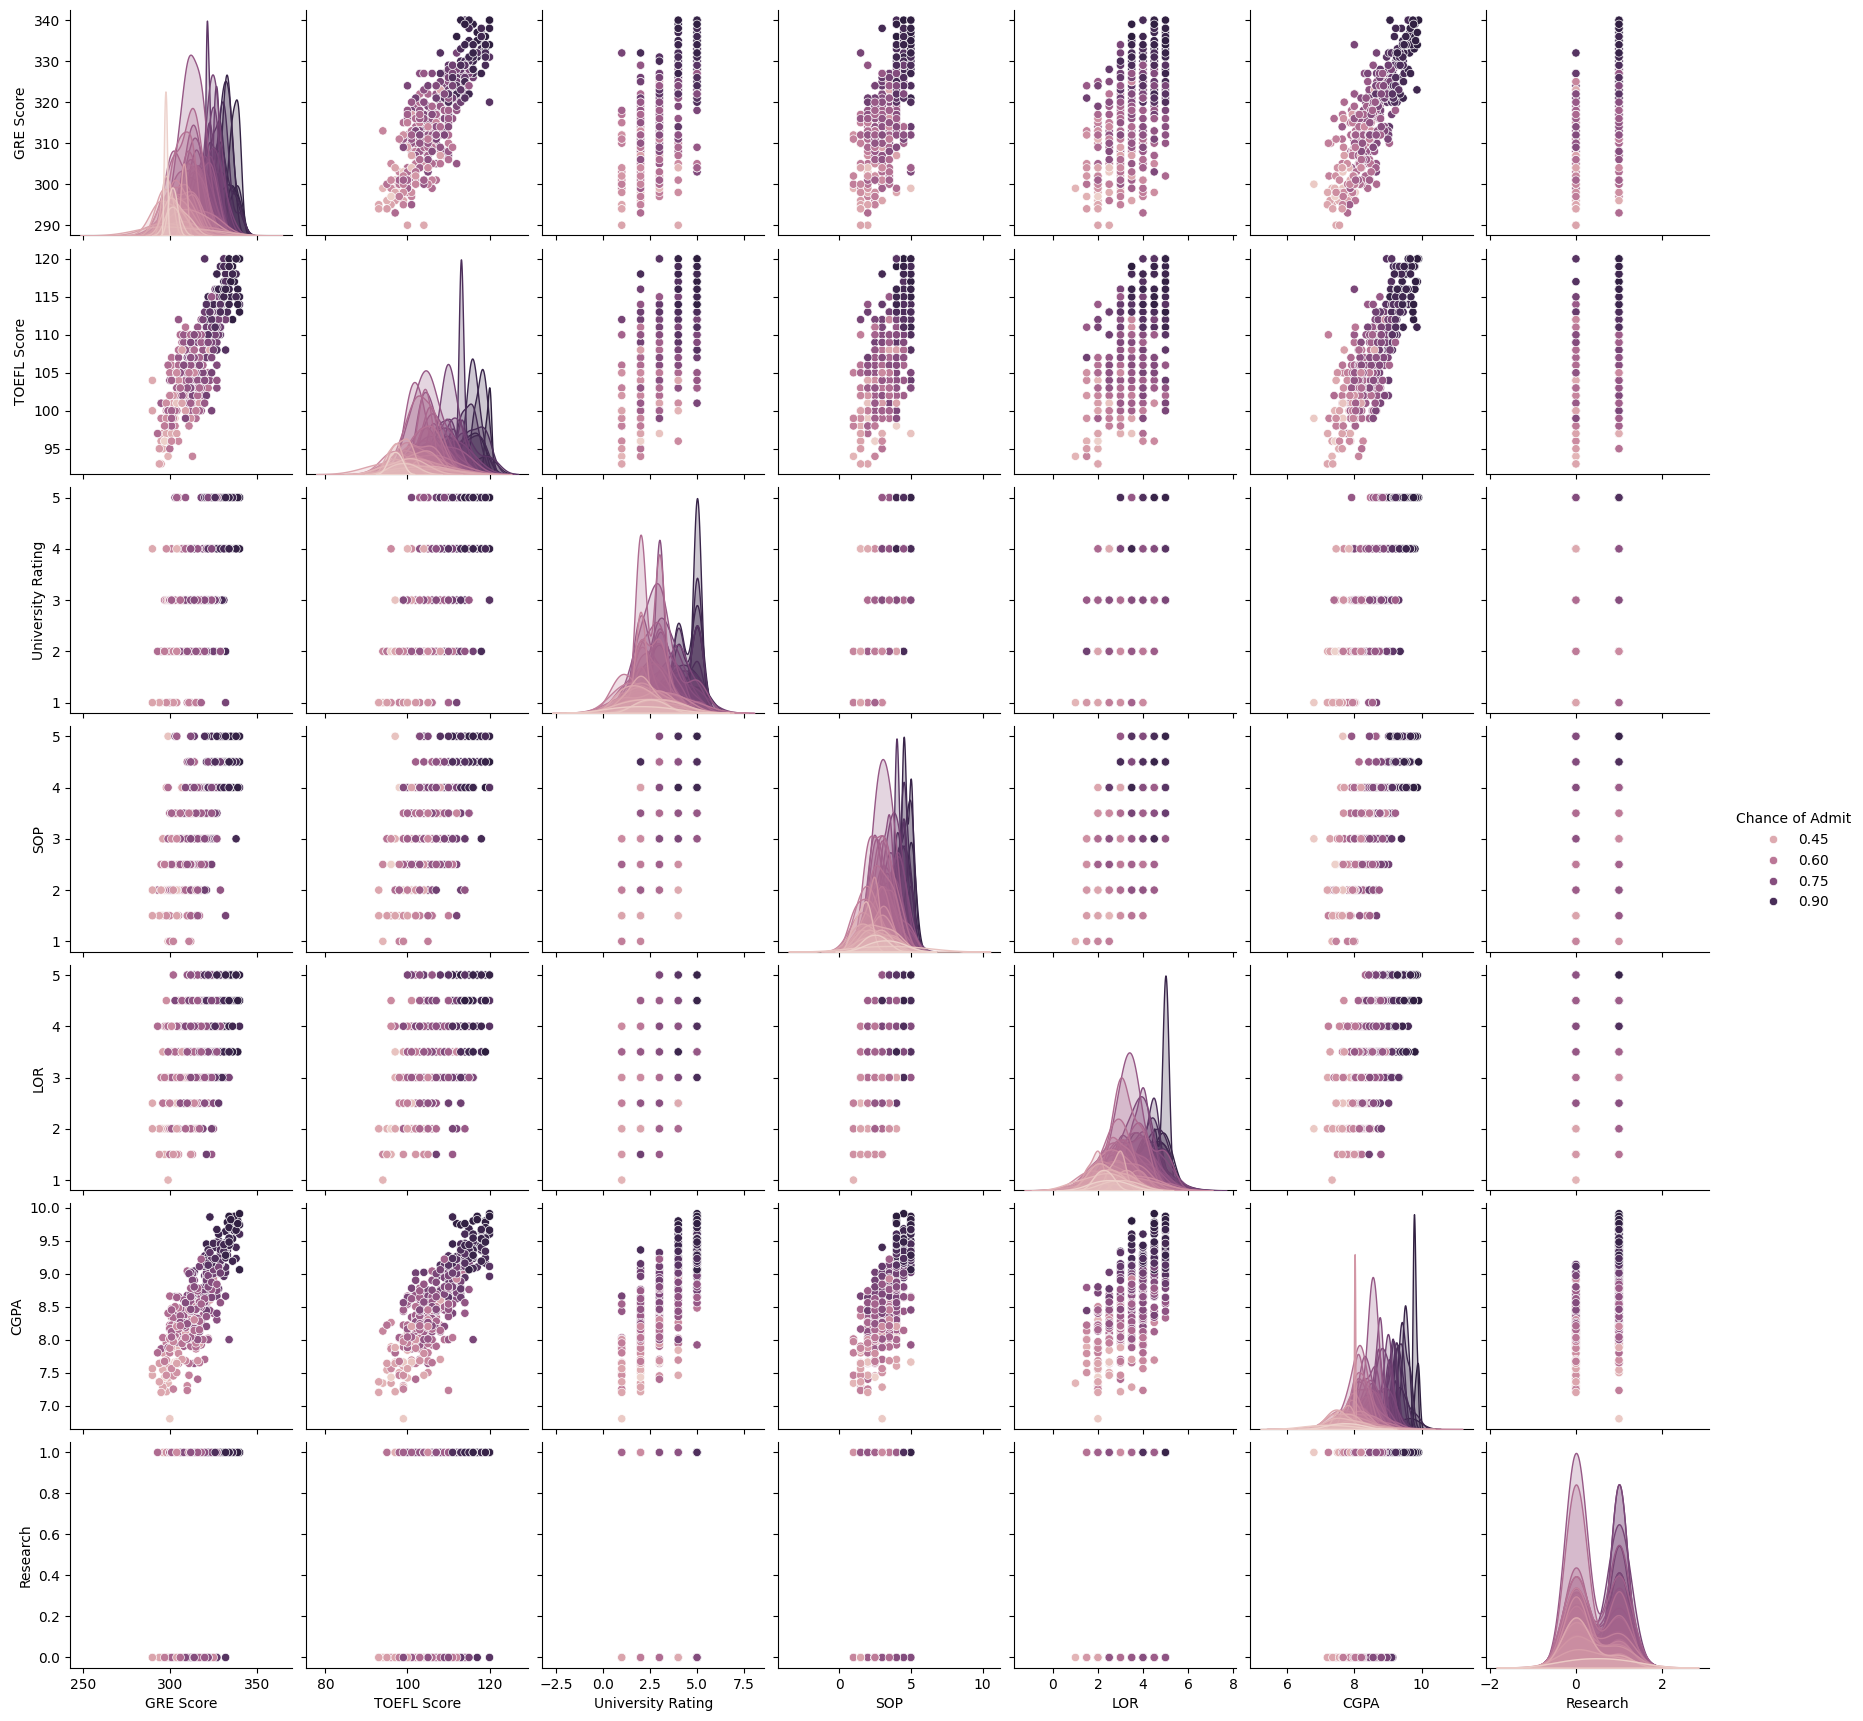

In [8]:
# Pairwise feature plots
sns.pairplot(data=train, hue="Chance of Admit", kind="scatter")

In [9]:
%%time
while delta_Error > error_threshold:

    # if we reach the max number of epochs, we stop
    ephocs += 1
    if ephocs > max_epochs:
        print('we reached the max number of epochs')
        break

    y_hat = np.dot(x_train, w[1:]) + w[0]
    
    w[0] = w[0]*(1 - learning_rate * weight_decay) - learning_rate/len(x_train) * np.sum(y_hat - y_train)
    
    # update the weights
    # w[1:] = w[1:] - learning_rate/len(x_train) * np.dot((y_hat - y_train), x_train)

    # with weights decay
    w[1:] = w[1:]*(1 - learning_rate * weight_decay) - learning_rate/len(x_train) * np.dot((y_hat - y_train), x_train)

    error = np.mean((y_train - y_hat) ** 2)

    delta_Error = abs(old_Error - error)
    old_Error = error

    if delta_Error < error_threshold:
        print('we reached the error threshold')
        print(f'Error: {error} Delta Error: {delta_Error} Epochs: {ephocs}')

    if ephocs % 100000 == 0:
        print(f'Error: {error} Delta Error: {delta_Error} Epochs: {ephocs}')



Error: 0.1934786829397498 Delta Error: 4.513132574684997e-06 Epochs: 100000
Error: 0.04785923108249847 Delta Error: 3.3173638541716954e-07 Epochs: 200000
Error: 0.03002639080796981 Delta Error: 1.0160824142485536e-07 Epochs: 300000
Error: 0.022690959626848254 Delta Error: 5.284738472527417e-08 Epochs: 400000
Error: 0.0185937945107265 Delta Error: 3.1658619711882885e-08 Epochs: 500000
Error: 0.01601571509528912 Delta Error: 2.1036267592450253e-08 Epochs: 600000
Error: 0.014229843540592061 Delta Error: 1.521261146913977e-08 Epochs: 700000
Error: 0.012897950085472834 Delta Error: 1.1688487764477395e-08 Epochs: 800000
Error: 0.011853642389482303 Delta Error: 9.338117657603506e-09 Epochs: 900000
Error: 0.011008903924999066 Delta Error: 7.638788334513036e-09 Epochs: 1000000
Error: 0.010312765436415993 Delta Error: 6.336876969340044e-09 Epochs: 1100000
Error: 0.009732710655795911 Delta Error: 5.30132836587538e-09 Epochs: 1200000
Error: 0.009246100787774034 Delta Error: 4.4586638669325e-09 Epo

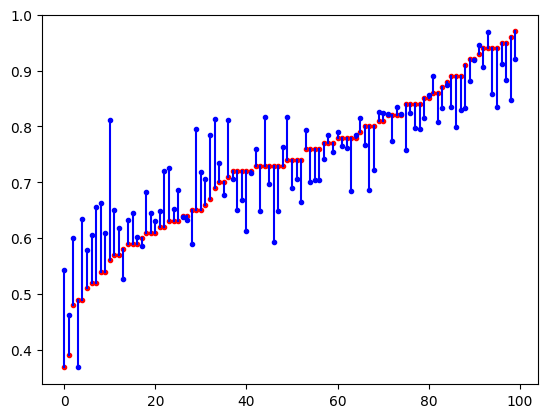

In [10]:
# plot target against predicted
y_hat = np.dot(x_test, w[1:]) + w[0]

# Negative values are not possible for the target also value should be between 0 and 1 
# so we clip the values
y_hat = np.clip(y_hat, 0, 1)


y_test_sorted = np.sort(y_test)
idx = np.argsort(y_test)
y_hat_hat = y_hat[idx]

# plot the target in red
plt.plot(y_test_sorted, 'r.')
# plot the predicted in blue
plt.plot(y_hat_hat, 'b.')

# plot a line between the points
for i in range(len(y_test)):
    plt.plot([i, i], [y_test_sorted[i], y_hat_hat[i]], 'b-')


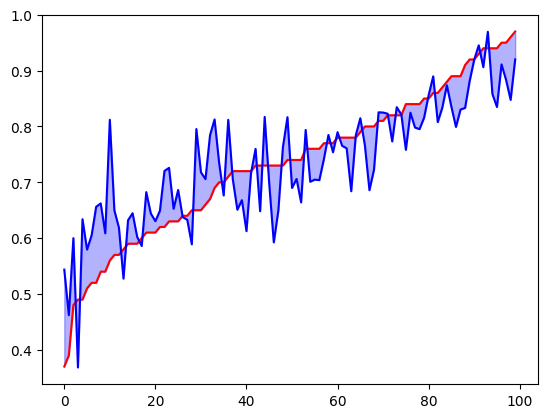

In [11]:
# make a ribbon plot of expected values
plt.plot(y_test_sorted, 'r')
plt.plot(y_hat_hat, 'b')
plt.fill_between(np.arange(len(y_test)), y_test_sorted, y_hat_hat, color='blue', alpha=0.3)

Variance: 0.005207991687670754 Standard Deviation: 0.07216641661930259


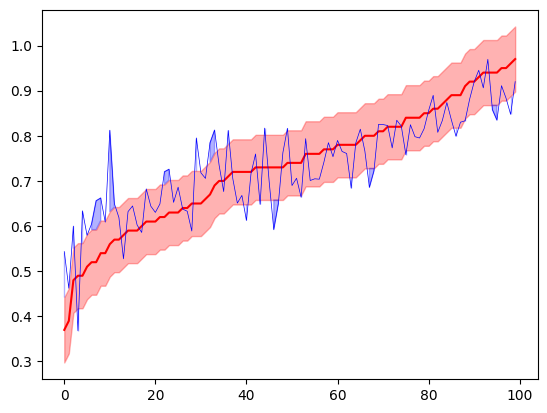

In [12]:
# Calculate the variance and the standard deviation of the error
variance = np.var(y_test - y_hat)
std_dev = np.sqrt(variance)

print(f'Variance: {variance} Standard Deviation: {std_dev}')

# make a ribbon plot of expected values
plt.plot(y_test_sorted, 'r')
plt.fill_between(np.arange(len(y_test)), y_test_sorted - std_dev, y_test_sorted + std_dev, color='red', alpha=0.3)
plt.fill_between(np.arange(len(y_test)), y_test_sorted + std_dev, y_hat_hat , where = y_hat_hat > (y_test_sorted + std_dev), color='blue', alpha=0.3)
plt.fill_between(np.arange(len(y_test)), y_test_sorted - std_dev, y_hat_hat , where = y_hat_hat < (y_test_sorted - std_dev), color='blue', alpha=0.3)
plt.plot(y_hat_hat, 'b', linewidth = '0.5')

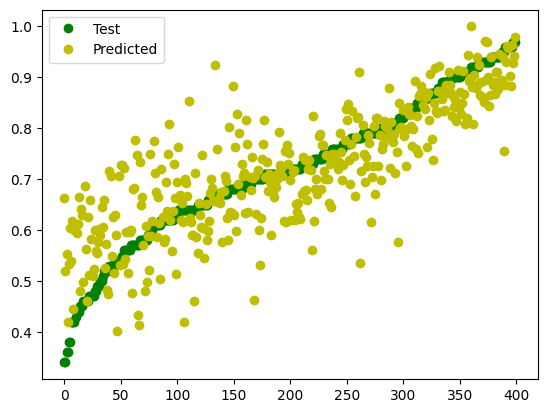

In [13]:
y_hat = np.dot(x_train, w[1:]) + w[0]

y_hat = np.clip(y_hat, 0, 1)

y_train_sorted = np.sort(y_train)
idx = np.argsort(y_train)
y_hat_hat = y_hat[idx]

plt.plot(y_train_sorted, 'go')
plt.plot(y_hat_hat, 'yo')
plt.legend(['Test', 'Predicted', 'Train', 'Predicted Train'])

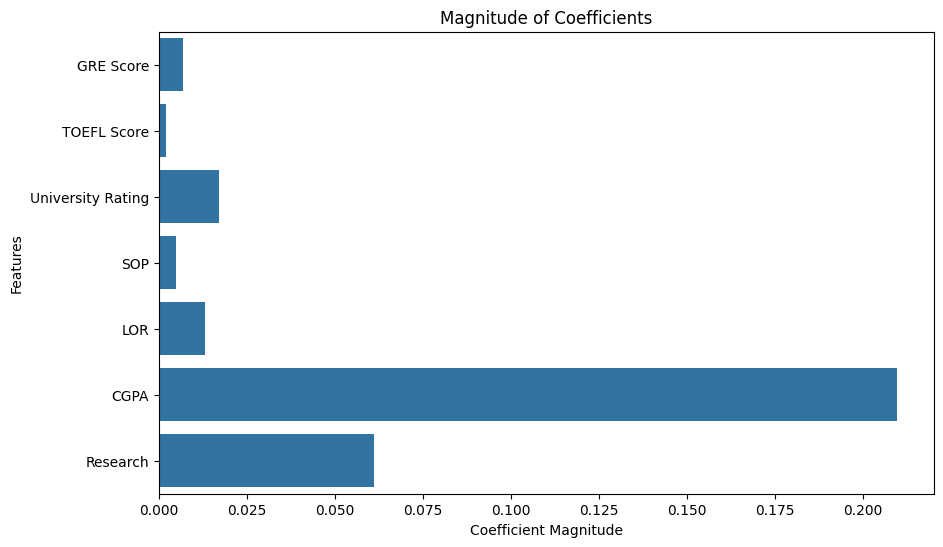

In [14]:
feature_weights = np.abs(w[1:])
# Get feature names
feature_names = train.columns[:-1]  # Assuming the last column is the target variable


# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_weights, y=feature_names)
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Features')
plt.title('Magnitude of Coefficients')
plt.show()


In [15]:
# calculate the R-squared
r_squared = 1 - np.sum((y_train - y_hat) ** 2) / np.sum((y_train - np.mean(y_train)) ** 2)
r_squared

0.6514805584819917

In [16]:
# degree of freedom
n = len(y_train)
p = x_train.shape[1]
dof = n - p - 1
dof

392

In [21]:
# plot the error distribution
error = y_train - y_hat
sns.histplot(error, kde=True)
plt.xlabel('Error')
plt.ylabel('Density')
plt.title('Error Distribution')

ValueError: operands could not be broadcast together with shapes (400,) (100,) 

[[  1.   316.   107.   ...   3.5    8.64   1.  ]
 [  1.   315.   104.   ...   2.5    8.1    0.  ]
 [  1.   318.   107.   ...   3.5    8.27   1.  ]
 ...
 [  1.   332.   116.   ...   5.     9.28   1.  ]
 [  1.   312.   107.   ...   4.     8.65   1.  ]
 [  1.   326.   111.   ...   4.     9.23   1.  ]]


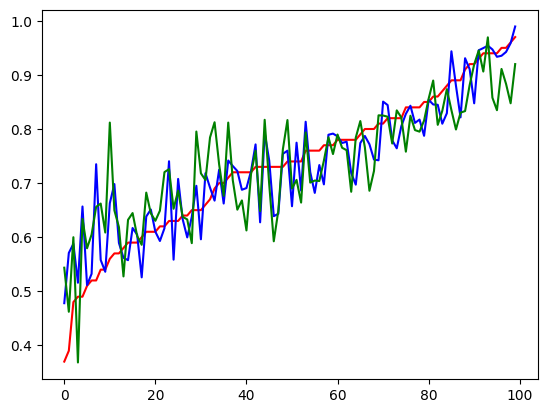

In [18]:
# Append a column of ones to x_train to represent the bias term
x_train_with_bias = np.column_stack([np.ones(len(x_train)), x_train])
print(x_train_with_bias)

# calculate w*
w_star = np.dot(np.linalg.inv(np.dot(x_train_with_bias.T, x_train_with_bias)), np.dot(x_train_with_bias.T, y_train))

# calculate y_hat
y_hat_star = np.dot(x_test, w_star[1:]) + w_star[0]

# order the values
y_test_sorted = np.sort(y_test)
idx = np.argsort(y_test)
y_hat_star_sorted = y_hat_star[idx]

# plot target against predicted
y_hat = np.dot(x_test, w[1:]) + w[0]

# Negative values are not possible for the target also value should be between 0 and 1 
# so we clip the values
y_hat = np.clip(y_hat, 0, 1)


y_test_sorted = np.sort(y_test)
idx = np.argsort(y_test)
y_hat_hat = y_hat[idx]

# plot target against predicted
plt.plot(y_test_sorted, 'r')
plt.plot(y_hat_star_sorted, 'b')
plt.plot(y_hat_hat, 'g')

 

In [19]:
# compare w and w*
w, w_star

(array([ 0.78306419, -0.00704464,  0.00207326,  0.01707542,  0.00486272,
         0.01312295,  0.20963787,  0.06105655]),
 array([-1.38721824e+00,  2.30947521e-03,  2.67907132e-03,  3.48151001e-03,
         1.06378975e-03,  1.77963759e-02,  1.17088993e-01,  1.86306447e-02]))